# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


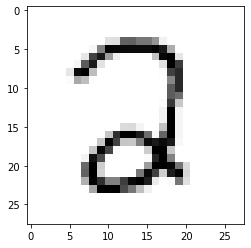

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.22977576554030624
train accuracy is: 0.7766649974962444, test accuracy is 0.7923387096774194


Epoch 10 Loss 0.0525244705506551
train accuracy is: 0.9473376731764314, test accuracy is 0.9576612903225806


Epoch 20 Loss 0.03779104962197224
train accuracy is: 0.9595226172592222, test accuracy is 0.9627016129032258


Epoch 30 Loss 0.03225272768449807
train accuracy is: 0.9651143381739276, test accuracy is 0.9647177419354839


Epoch 40 Loss 0.029089953056230806
train accuracy is: 0.9670338841595727, test accuracy is 0.9672379032258065


Epoch 50 Loss 0.02696106965691513
train accuracy is: 0.9691203471874479, test accuracy is 0.967741935483871


Epoch 60 Loss 0.02535561779492863
train accuracy is: 0.9711233516942079, test accuracy is 0.967741935483871


Epoch 70 Loss 0.024075302042421854
train accuracy is: 0.9729594391587381, test accuracy is 0.9692540322580645


Epoch 80 Loss 0.022979327216229545
train accuracy is: 0.9743782340176932, test accuracy is 0.9712701612903226


Epoch 90 Loss 0.021987395801918365
train accuracy is: 0.9751293607077283, test accuracy is 0.9727822580645161


Epoch 100 Loss 0.021136778341133654
train accuracy is: 0.9758804873977633, test accuracy is 0.9732862903225806


Epoch 110 Loss 0.020345496688691782
train accuracy is: 0.9766316140877984, test accuracy is 0.9737903225806451


Epoch 120 Loss 0.019626066564573795
train accuracy is: 0.9780504089467534, test accuracy is 0.9747983870967742


Epoch 130 Loss 0.018938825663910093
train accuracy is: 0.9792188282423635, test accuracy is 0.9747983870967742


Epoch 140 Loss 0.018274905109912375
train accuracy is: 0.9800534134535136, test accuracy is 0.9747983870967742


Epoch 150 Loss 0.017647311617591588
train accuracy is: 0.9808879986646637, test accuracy is 0.9753024193548387


Epoch 160 Loss 0.01705387437501825
train accuracy is: 0.9812218327491237, test accuracy is 0.9753024193548387


Epoch 170 Loss 0.016491562850612252
train accuracy is: 0.9821398764813888, test accuracy is 0.9758064516129032


Epoch 180 Loss 0.015942022314197606
train accuracy is: 0.9826406276080788, test accuracy is 0.9758064516129032


Epoch 190 Loss 0.015426346231884276
train accuracy is: 0.9837255883825738, test accuracy is 0.9758064516129032


Epoch 200 Loss 0.014922672593058586
train accuracy is: 0.9843932565514939, test accuracy is 0.9763104838709677


Epoch 210 Loss 0.014444437967070093
train accuracy is: 0.985060924720414, test accuracy is 0.9778225806451613


Epoch 220 Loss 0.013999472218403353
train accuracy is: 0.986145885494909, test accuracy is 0.9793346774193549


Epoch 230 Loss 0.013567128066030824
train accuracy is: 0.986646636621599, test accuracy is 0.9798387096774194


Epoch 240 Loss 0.01316325946931776
train accuracy is: 0.9871473877482891, test accuracy is 0.9793346774193549


0.0022809375132155393

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23324262677506433
train accuracy is: 0.7415289601068269, test accuracy is 0.7394153225806451


Epoch 10 Loss 0.10292372203551338
train accuracy is: 0.9051911200133533, test accuracy is 0.9122983870967742


Epoch 20 Loss 0.0793143700982995
train accuracy is: 0.9261392088132199, test accuracy is 0.9349798387096774


Epoch 30 Loss 0.06831263575000814
train accuracy is: 0.9346519779669504, test accuracy is 0.9455645161290323


Epoch 40 Loss 0.061687761012456224
train accuracy is: 0.9404940744450009, test accuracy is 0.952116935483871


Epoch 50 Loss 0.057174669811108914
train accuracy is: 0.9450842931063261, test accuracy is 0.953125


Epoch 60 Loss 0.05386287513548721
train accuracy is: 0.9476715072608913, test accuracy is 0.9546370967741935


Epoch 70 Loss 0.05130671348977792
train accuracy is: 0.9491737606409615, test accuracy is 0.9571572580645161


Epoch 80 Loss 0.04926004696987054
train accuracy is: 0.9505925554999165, test accuracy is 0.9586693548387096


Epoch 90 Loss 0.047574420495538616
train accuracy is: 0.9515105992321816, test accuracy is 0.9596774193548387


Epoch 100 Loss 0.04615552116400194
train accuracy is: 0.9530963111333667, test accuracy is 0.9611895161290323


Epoch 110 Loss 0.04493970065546889
train accuracy is: 0.9540143548656318, test accuracy is 0.9632056451612904


Epoch 120 Loss 0.04388262723811436
train accuracy is: 0.9547654815556669, test accuracy is 0.9647177419354839


Epoch 130 Loss 0.04295095494823825
train accuracy is: 0.9554331497245869, test accuracy is 0.9642137096774194


Epoch 140 Loss 0.04212314646801945
train accuracy is: 0.956518110499082, test accuracy is 0.9642137096774194


Epoch 150 Loss 0.0413802229998967
train accuracy is: 0.957018861625772, test accuracy is 0.9647177419354839


Epoch 160 Loss 0.04070844403063737
train accuracy is: 0.957519612752462, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.0400976063534207
train accuracy is: 0.957519612752462, test accuracy is 0.9657258064516129


Epoch 180 Loss 0.03953825912104454
train accuracy is: 0.9579369053580371, test accuracy is 0.9657258064516129


Epoch 190 Loss 0.039024646486009326
train accuracy is: 0.9584376564847271, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.038548724581860205
train accuracy is: 0.9591053246536472, test accuracy is 0.9662298387096774


Epoch 210 Loss 0.03810707990886602
train accuracy is: 0.9596060757803372, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.03769554710848705
train accuracy is: 0.9597729928225672, test accuracy is 0.9662298387096774


Epoch 230 Loss 0.03731077330695981
train accuracy is: 0.9603572024703723, test accuracy is 0.9662298387096774


Epoch 240 Loss 0.03694993840575334
train accuracy is: 0.9607744950759473, test accuracy is 0.9662298387096774


0.010606273267438971

### Comparing results of NN and LR

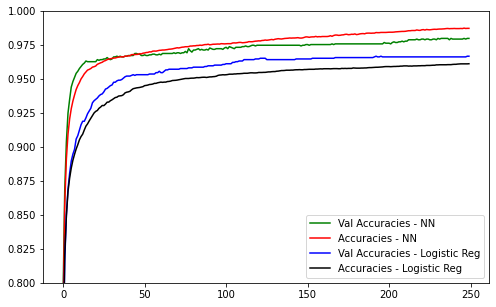

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

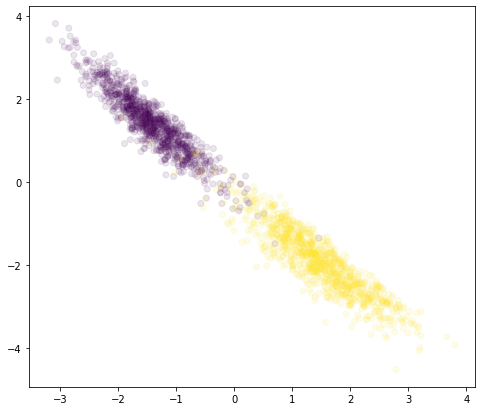

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

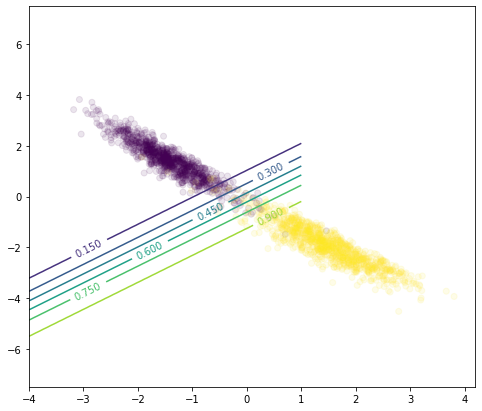

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );